In [ ]:
import serial
import numpy as np
import os
import time
import csv
import matplotlib.pyplot as plt
import pandas as pd



# Configuration des paramètres
SERIAL_PORT = "/dev/ttyACM0"
BAUD_RATE = 115200
NUM_SAMPLES = 1024
SAMPLE_RATE = 88200
MAX_DISPLAY_FREQ = 22000
DURATION = 10  # Durée d'enregistrement
FILENAME = "spectrogram.csv"
SAVE_DIR = "."

os.makedirs(SAVE_DIR, exist_ok=True)
filepath = os.path.join(SAVE_DIR, FILENAME)

ser = serial.Serial(SERIAL_PORT, BAUD_RATE)
print(f"Collecting data for {DURATION} seconds...")

start_time = time.time()
with open(filepath, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["fft_bin_" + str(i) for i in range(NUM_SAMPLES // 2)])

    cpt = 0

    try:
        while time.time() - start_time < DURATION:
            if ser.in_waiting:
                try:
                    data = ser.readline().decode().strip()
                    fft_data = [float(x) for x in data.split(",") if x]
                    if len(fft_data) == NUM_SAMPLES // 2:
                        writer.writerow(fft_data)
                        print(f"fft index: {cpt}") 
                        cpt += 1
                    else:
                        print(f"Unexpected FFT data length: {len(fft_data)}")
                except Exception as e:
                    print(f"Error reading data: {e}")

    finally:
        ser.close()
        print(f"Data saved to {filepath}")


fft index: 0
fft index: 1
fft index: 2
fft index: 3
fft index: 4
fft index: 5
fft index: 6
fft index: 7
fft index: 8
fft index: 9
fft index: 10
fft index: 11
fft index: 12
fft index: 13
fft index: 14
fft index: 15
fft index: 16
fft index: 17
fft index: 18
fft index: 19
fft index: 20
fft index: 21
fft index: 22
fft index: 23
fft index: 24
fft index: 25
fft index: 26
fft index: 27
fft index: 28
fft index: 29
fft index: 30
fft index: 31
fft index: 32
fft index: 33
fft index: 34
fft index: 35
fft index: 36
fft index: 37
fft index: 38
fft index: 39
fft index: 40
fft index: 41
fft index: 42
fft index: 43
fft index: 44
fft index: 45
fft index: 46
fft index: 47
fft index: 48
fft index: 49
fft index: 50
fft index: 51
fft index: 52
fft index: 53
fft index: 54
fft index: 55
fft index: 56
fft index: 57
fft index: 58
fft index: 59
fft index: 60
fft index: 61
fft index: 62
fft index: 63
fft index: 64
fft index: 65
fft index: 66
fft index: 67
fft index: 68
fft index: 69
fft index: 70
fft index: 71
ff

Number of bins: 255
FFT size: 1020 bytes


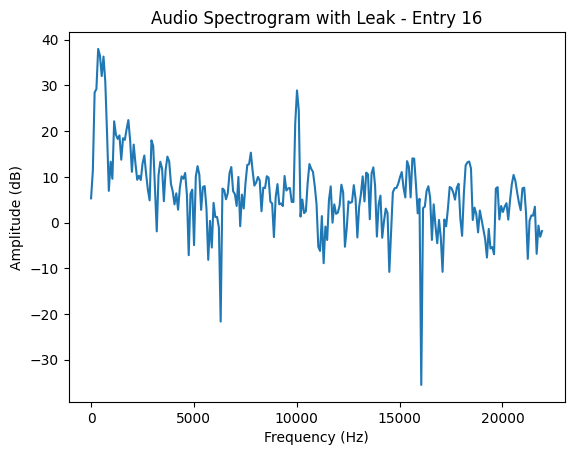

In [ ]:
FILENAME_LEAK = "spectrogram.csv"
NUM_SAMPLES = 1024
SAMPLE_RATE = 88200
MAX_DISPLAY_FREQ = 22000

def plot_single_spectrogram_entry(filename, title, entry_index):
    filepath = filename
    if not os.path.exists(filepath):
        print(f"Fichier {filepath} introuvable. Assurez-vous d'avoir collecté les données.")
        return

    data = pd.read_csv(filepath).to_numpy()
    if entry_index >= data.shape[0]:
        print(f"Index {entry_index} out of range for data with {data.shape[0]} entries.")
        return

    freq_bins = data.shape[1]
    frequencies = np.linspace(0, SAMPLE_RATE / 2, freq_bins)
    freq_limit_idx = int((MAX_DISPLAY_FREQ / (SAMPLE_RATE / 2)) * freq_bins)
    frequencies = frequencies[:freq_limit_idx]

    spectrogram_entry = data[entry_index, :freq_limit_idx]

    plt.figure()
    plt.plot(frequencies, spectrogram_entry)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude (dB)")
    plt.title(f"{title} - Entry {entry_index}")
    plt.show()

# Plot a single entry of the spectrogram for leak data
plot_single_spectrogram_entry(FILENAME_LEAK, "Audio Spectrogram with Leak", entry_index=np.random.randint(0, 32))


(33, 512)
44.95
-58.11


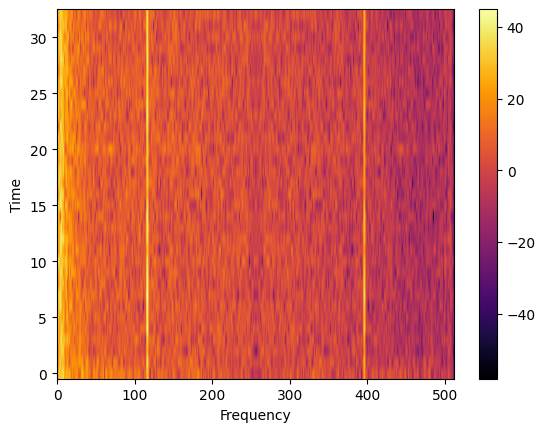

(33, 256)
44.95
-35.52


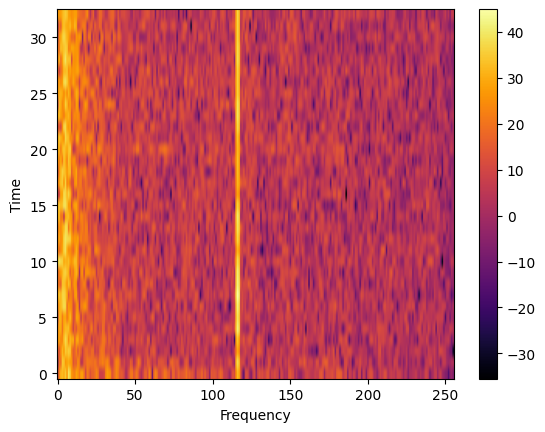

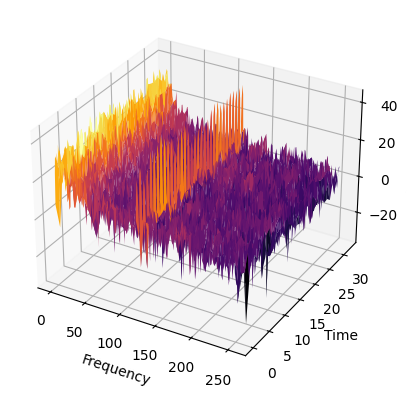

In [44]:
# Open csv file
data = pd.read_csv("spectrogram.csv")
data = data.to_numpy()

print(data.shape) # (32, 512) : 32 frequency bins, 512 time steps. 32 frequency bins for 22 kHz = 22000/512 = 42 Hz per bin

print(data.max()) # 65.71
print(data.min()) # -43.95

# plot spectrogram x : time, y : frequency, color : amplitude
plt.imshow(data, cmap='inferno', origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel("Frequency")
plt.ylabel("Time")
plt.show()

# crop the spectrogram at half of the frequency bins
data = data[:, :data.shape[1]//2]

print(data.shape)
print(data.max())
print(data.min())

# plot cropped spectrogram
plt.imshow(data, cmap='inferno', origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel("Frequency")
plt.ylabel("Time")
plt.show()

# 3d plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(data.shape[1])
y = np.arange(data.shape[0])
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, data, cmap='inferno')
ax.set_xlabel('Frequency')
ax.set_ylabel('Time')
ax.set_zlabel('Amplitude')
plt.show()



